In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier

In [2]:
#load data
from google.colab import files
uploaded = files.upload()


Saving wdbc.csv to wdbc.csv


In [0]:
df = pd.read_csv('wdbc.csv')

In [5]:
#data shape
df.shape

(568, 32)

In [6]:
df.head(7)
#M=malignent(harmful)
#B=Benign

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [0]:
df.columns=['id','diagnosis','radius_mean','texture_mean',
            'perimeter_mean','area_mean','smoothness_mean',
            'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
            'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
            'compactness_se','concavity_se','concave points_se','symmetry_se',
            'fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
            'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

In [12]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [14]:
#check for null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_mean     0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
#check data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_mean     float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
labelencoder_Y = LabelEncoder()
#create array 0f 1 and 0 and add to array
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


In [31]:
#print five rows of data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [27]:
#Count of melignent(1) or Benign cells(0)
df['diagnosis'].value_counts()

0    357
1    211
Name: diagnosis, dtype: int64

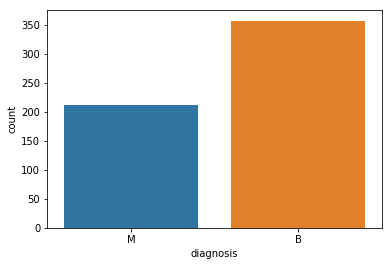

In [19]:
#visualize count
sns.countplot(df['diagnosis'],label='count')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


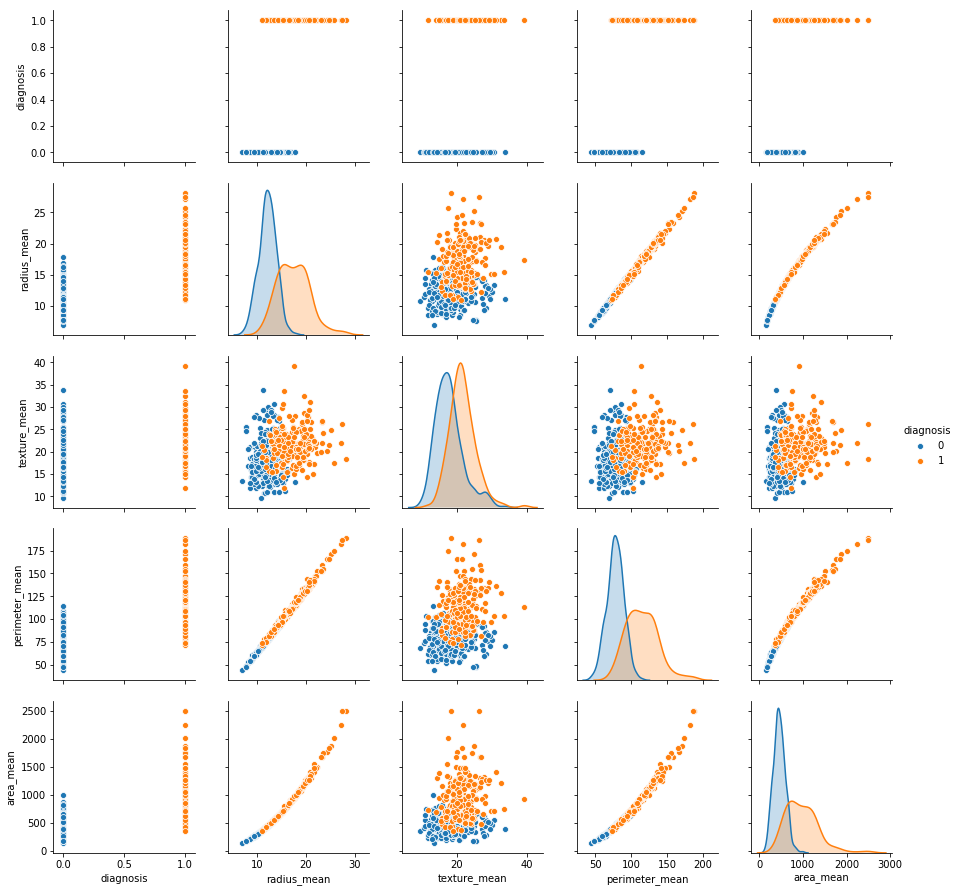

In [29]:
#create pairplot
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

In [37]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.729376,0.422146,0.741887,0.708389,0.356276,0.595587,0.695648,0.776369,0.327336,-0.018099
radius_mean,0.729376,1.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749
texture_mean,0.422146,0.329383,1.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771
perimeter_mean,0.741887,0.997876,0.335918,1.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103
area_mean,0.708389,0.987344,0.326193,0.986548,1.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560
smoothness_mean,0.356276,0.168094,-0.017769,0.204505,0.174838,1.000000,0.657741,0.519002,0.551009,0.555259,0.582435
compactness_mean,0.595587,0.505129,0.252038,0.555676,0.497981,0.657741,1.000000,0.881619,0.829050,0.598095,0.560161
concavity_mean,0.695648,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,1.000000,0.920462,0.495525,0.329768
concave points_mean,0.776369,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,1.000000,0.457171,0.158464
symmetry_mean,0.327336,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,1.000000,0.475301


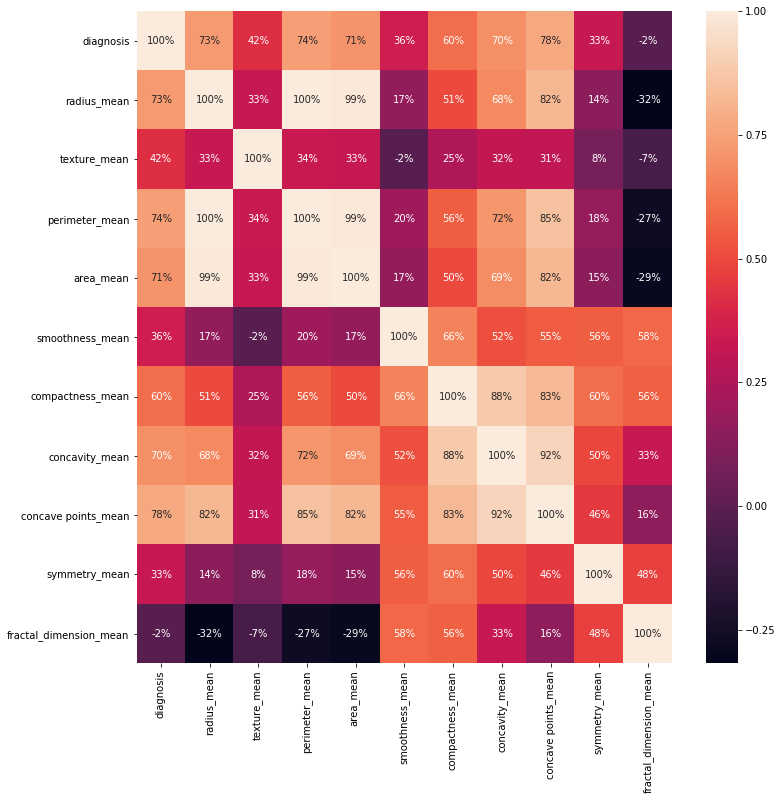

In [42]:
#visualize correlation of data
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

**End of data exploration**

In [44]:
#split data into X and Y datasets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

numpy.ndarray

In [0]:
#Split data into training and testing
X_train,X_test,Y_train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [0]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#create model function
def models(X_train,Y_train):
  forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
  forest.fit(X_train,Y_train)
  return forest

In [72]:
#print models accuracy
print('Random forest accuracy is ',forest.score(X_train,Y_train))


Random forest accuracy is  0.9976525821596244


In [0]:
#test model on confusion matrix
model = models(X_train, Y_train)

In [0]:
#test model accuracy on confusion matrix data
cm = confusion_matrix(Y_Test, model[0].predict(X_test))

In [86]:
print(cm)

[[88  4]
 [ 5 45]]


In [0]:
#True positive = 88
#True negative = 50
#False Positive = 4
#False Negative =3

In [87]:
print(classification_report(Y_Test,model[0].predict(X_test)))
print(accuracy_score(Y_Test,model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        92
           1       0.92      0.90      0.91        50

    accuracy                           0.94       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.94      0.94      0.94       142

0.9366197183098591


In [88]:
#prediction of random forest
pred = model[0].predict(X_test)
print(pred)
print('------------------')
print(Y_Test)

[0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
------------------
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
